In [960]:
###
# This code answer a question:
# Making a relationship between the number of contacts and campaign success
# what are the relevant points to be observed?
# By Sidon 2018
###

In [961]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn
import scipy
from tabulate import tabulate, tabulate_formats
import prettyprint
from utils import Dataset
%matplotlib inline 

In [962]:
ds =  Dataset()
data = ds.get_data(['campaign','previous','y'])

In [963]:
# Inserir coluna para totalizar os contatos realizados
tt_contacts = data.campaign+data['previous'] 
data.insert(loc=2, column='tt_contacts', value=tt_contacts)

In [964]:
data1 = data.copy()

In [965]:
# Remove outliers
q = data1['tt_contacts'].quantile(0.997)
data1 = data1[data1['tt_contacts']<q]


In [966]:
data1

,campaign,previous,tt_contacts,y
0,1,0,1,no
1,1,0,1,no
2,1,0,1,no
3,1,0,1,no
4,1,0,1,no
...,...,...,...,...
45206,3,0,3,yes
45207,2,0,2,yes
45208,5,3,8,yes
45209,4,0,4,no


In [967]:
# qs = [0, .8, .9, 1]
# qs = [0,.8, .95, .96, .97,.98,.99,.995,.997,.998,.999,.9999, 1]
# data1.tt_contacts = pd.qcut(data['tt_contacts'],qs)
# data1.tt_contacts = pd.cut(data['tt_contacts'],[0,5,10,15,20,25,30,35,40,45,50,55,60,277])
# data1.tt_contacts = pd.cut(data['tt_contacts'],[5,6,7,8])



In [968]:
# Convert categories labels to string
# data1.tt_contacts.cat.categories = [c.__str__() for c in data1.tt_contacts.cat.categories]

In [969]:
totals = totals = pd.DataFrame(data1.tt_contacts)
totals['y'] = totals.index

In [970]:
# data1.tt_contacts.value_counts

In [971]:
# contingency table of observed counts
ct1 = pd.crosstab(data1.y, data1.tt_contacts)
ct2 = pd.crosstab(data1.tt_contacts, data1.y)


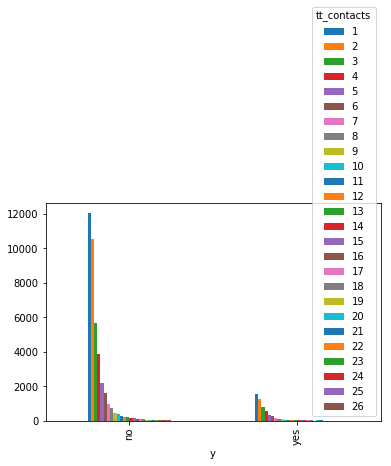

In [972]:
ct1.plot.bar()

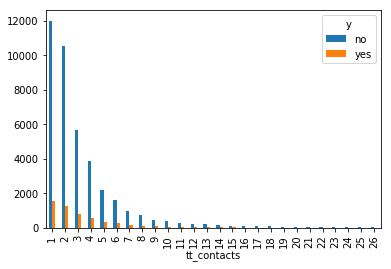

In [973]:
ct2.plot.bar()

In [974]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
# print(tabulate(colpct, tablefmt='fancy_grid', headers='keys', numalign="center"))
# print(colpct.loc['yes'].sort_values(ascending=False))


In [975]:
colpct_t = colpct.T
# colpct_t = colpct_t.sort_values()
print(tabulate(colpct_t, tablefmt='fancy_grid', headers='keys', numalign="center"))

╒═══════════════╤══════════╤═══════════╕
│  tt_contacts  │    no    │    yes    │
╞═══════════════╪══════════╪═══════════╡
│       1       │ 0.887427 │ 0.112573  │
├───────────────┼──────────┼───────────┤
│       2       │ 0.893963 │ 0.106037  │
├───────────────┼──────────┼───────────┤
│       3       │ 0.875174 │ 0.124826  │
├───────────────┼──────────┼───────────┤
│       4       │ 0.871238 │ 0.128762  │
├───────────────┼──────────┼───────────┤
│       5       │ 0.863564 │ 0.136436  │
├───────────────┼──────────┼───────────┤
│       6       │ 0.86641  │  0.13359  │
├───────────────┼──────────┼───────────┤
│       7       │ 0.867152 │ 0.132848  │
├───────────────┼──────────┼───────────┤
│       8       │  0.8753  │  0.1247   │
├───────────────┼──────────┼───────────┤
│       9       │ 0.842491 │ 0.157509  │
├───────────────┼──────────┼───────────┤
│      10       │ 0.869955 │ 0.130045  │
├───────────────┼──────────┼───────────┤
│      11       │ 0.853583 │ 0.146417  │
├───────────────

In [976]:
#colsum
print(tabulate(pd.DataFrame(colsum), tablefmt='fancy_grid', headers=['Range','Contacts'] , numalign="center"))

╒═════════╤════════════╕
│  Range  │  Contacts  │
╞═════════╪════════════╡
│    1    │   13529    │
├─────────┼────────────┤
│    2    │   11760    │
├─────────┼────────────┤
│    3    │    6449    │
├─────────┼────────────┤
│    4    │    4419    │
├─────────┼────────────┤
│    5    │    2514    │
├─────────┼────────────┤
│    6    │    1819    │
├─────────┼────────────┤
│    7    │    1099    │
├─────────┼────────────┤
│    8    │    834     │
├─────────┼────────────┤
│    9    │    546     │
├─────────┼────────────┤
│   10    │    446     │
├─────────┼────────────┤
│   11    │    321     │
├─────────┼────────────┤
│   12    │    247     │
├─────────┼────────────┤
│   13    │    209     │
├─────────┼────────────┤
│   14    │    145     │
├─────────┼────────────┤
│   15    │    134     │
├─────────┼────────────┤
│   16    │    115     │
├─────────┼────────────┤
│   17    │     97     │
├─────────┼────────────┤
│   18    │     77     │
├─────────┼────────────┤
│   19    │     60     │


In [977]:
# G-test
chi2 = {}
cs1= scipy.stats.chi2_contingency(ct1, lambda_="log-likelihood")
chi2['chi-square'] = [cs1[0]]
chi2['p-value'] = [cs1[1]]
chi2['dof'] = [cs1[2]]
chi2['expected'] = [cs1[3]]
print (tabulate(chi2, tablefmt='fancy_grid', headers='keys', numalign="center"))


╒══════════════╤═════════════╤═══════╤═══════════════════════════════════════════════════════════════╕
│  chi-square  │   p-value   │  dof  │ expected                                                      │
╞══════════════╪═════════════╪═══════╪═══════════════════════════════════════════════════════════════╡
│   92.7197    │ 1.02469e-09 │  25   │ [[1.19432513e+04 1.03815977e+04 5.69310576e+03 3.90104425e+03 │
│              │             │       │   2.21933135e+03 1.60579305e+03 9.70185026e+02 7.36245961e+02 │
│              │             │       │   4.82002752e+02 3.93723859e+02 2.83375244e+02 2.18048864e+02 │
│              │             │       │   1.84502885e+02 1.28004394e+02 1.18293716e+02 1.01520726e+02 │
│              │             │       │   8.56305255e+01 6.79747470e+01 5.29673353e+01 5.47329132e+01 │
│              │             │       │   3.97255015e+01 2.82492455e+01 2.38353009e+01 2.73664566e+01 │
│              │             │       │   2.47180898e+01 1.67729895e+01]  

In [978]:
ct1

tt_contacts,1,2,3,4,5,...,22,23,24,25,26
y,,,,,,,,,,,
no,12006,10513,5644,3850,2171,...,31,26,30,26,19
yes,1523,1247,805,569,343,...,1,1,1,2,0


In [979]:
print(colpct.T)

y                  no       yes
tt_contacts                    
1            0.887427  0.112573
2            0.893963  0.106037
3            0.875174  0.124826
4            0.871238  0.128762
5            0.863564  0.136436
...               ...       ...
22           0.968750  0.031250
23           0.962963  0.037037
24           0.967742  0.032258
25           0.928571  0.071429
26           1.000000  0.000000

[26 rows x 2 columns]
